In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape
#There is 1000 rows and 40 columns 

(1000, 40)

In [4]:
df.isnull().sum()
#in _c39 whole is null value so we will drop directly
#apart from that there is no null value 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.drop(['_c39'],inplace=True,axis=1)
#drop the _c39

In [6]:
df.info()
#we have float64(2), int64(17), object(21) in dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.nunique()
#nunique value in dataset

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
df.duplicated().sum()
#no duplicated value in dataset

0

In [9]:
df.isin(['','NA','-']).sum().any()
#there is no whitespace , na values in datset

False

In [10]:
df.isin(['?']).sum().any()
#there is ? mark value present in dataset

True

In [11]:
#In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
#We will split this column into two CSL columns for person and accident.

In [12]:
# Spliting and extracting policy_csl at '/'
df['personal'] = df.policy_csl.str.split('/',expand=True)[0]
df['Accedental'] = df.policy_csl.str.split('/',expand=True)[1]

In [13]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [14]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,personal,Accedental
0,328,48,521585,17-10-2014,OH,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,250,500
1,228,42,342868,27-06-2006,IN,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,250,500
2,134,29,687698,06-09-2000,OH,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,100,300
3,256,41,227811,25-05-1990,IL,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,250,500
4,228,44,367455,06-06-2014,IL,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,500,1000
996,285,41,186934,05-01-2014,IL,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,100,300
997,130,34,918516,17-02-2003,OH,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,250,500
998,458,62,533940,18-11-2011,IL,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,500,1000


In [15]:
#We have two feature here with datetime datatypes.
#We gone split them in terms of date,month and year.

In [16]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [17]:
#We have one column name as 'auto_year' which depict year from which Automobile in operational on road. 
#In simple  Automobile age. 
#Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

In [18]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

In [19]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

#data seperation 

In [20]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], datetime64[ns]: ['policy_bind_date', 'incident_date'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'personal', 'Accedental']}

In [21]:
df.describe().T
#maximum deductable money is 2000 max and minimum is 500 against the premium 2047 whcih is max.
#capital gain is 100500 max and max loss which customer had to bear is 111100 .very high

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [22]:
df[Category].describe().T
#Maximum incident was reported from New york 
#we have ? marks in Property damge and police report available and collision_type columns, we will deal with them.

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,4,Rear Collision,292
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


In [23]:
# Start with Enlisting Value counts & Sub-categories of different categorial features available

In [24]:
for i in Category:
    print(i)
    print(df[i].value_counts())

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

In [25]:
#now we will fill ? value with finllna na method 

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])



In [27]:
df=df.replace('?',np.NaN)
df.isin(['','NA','-']).sum().any()
#there is value has been filled now 

False

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_bind_date'}>],
       [<AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>],
       [<AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_date'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>],
       [<AxesSubplot:title={'center':'injury_claim'}>,
        <

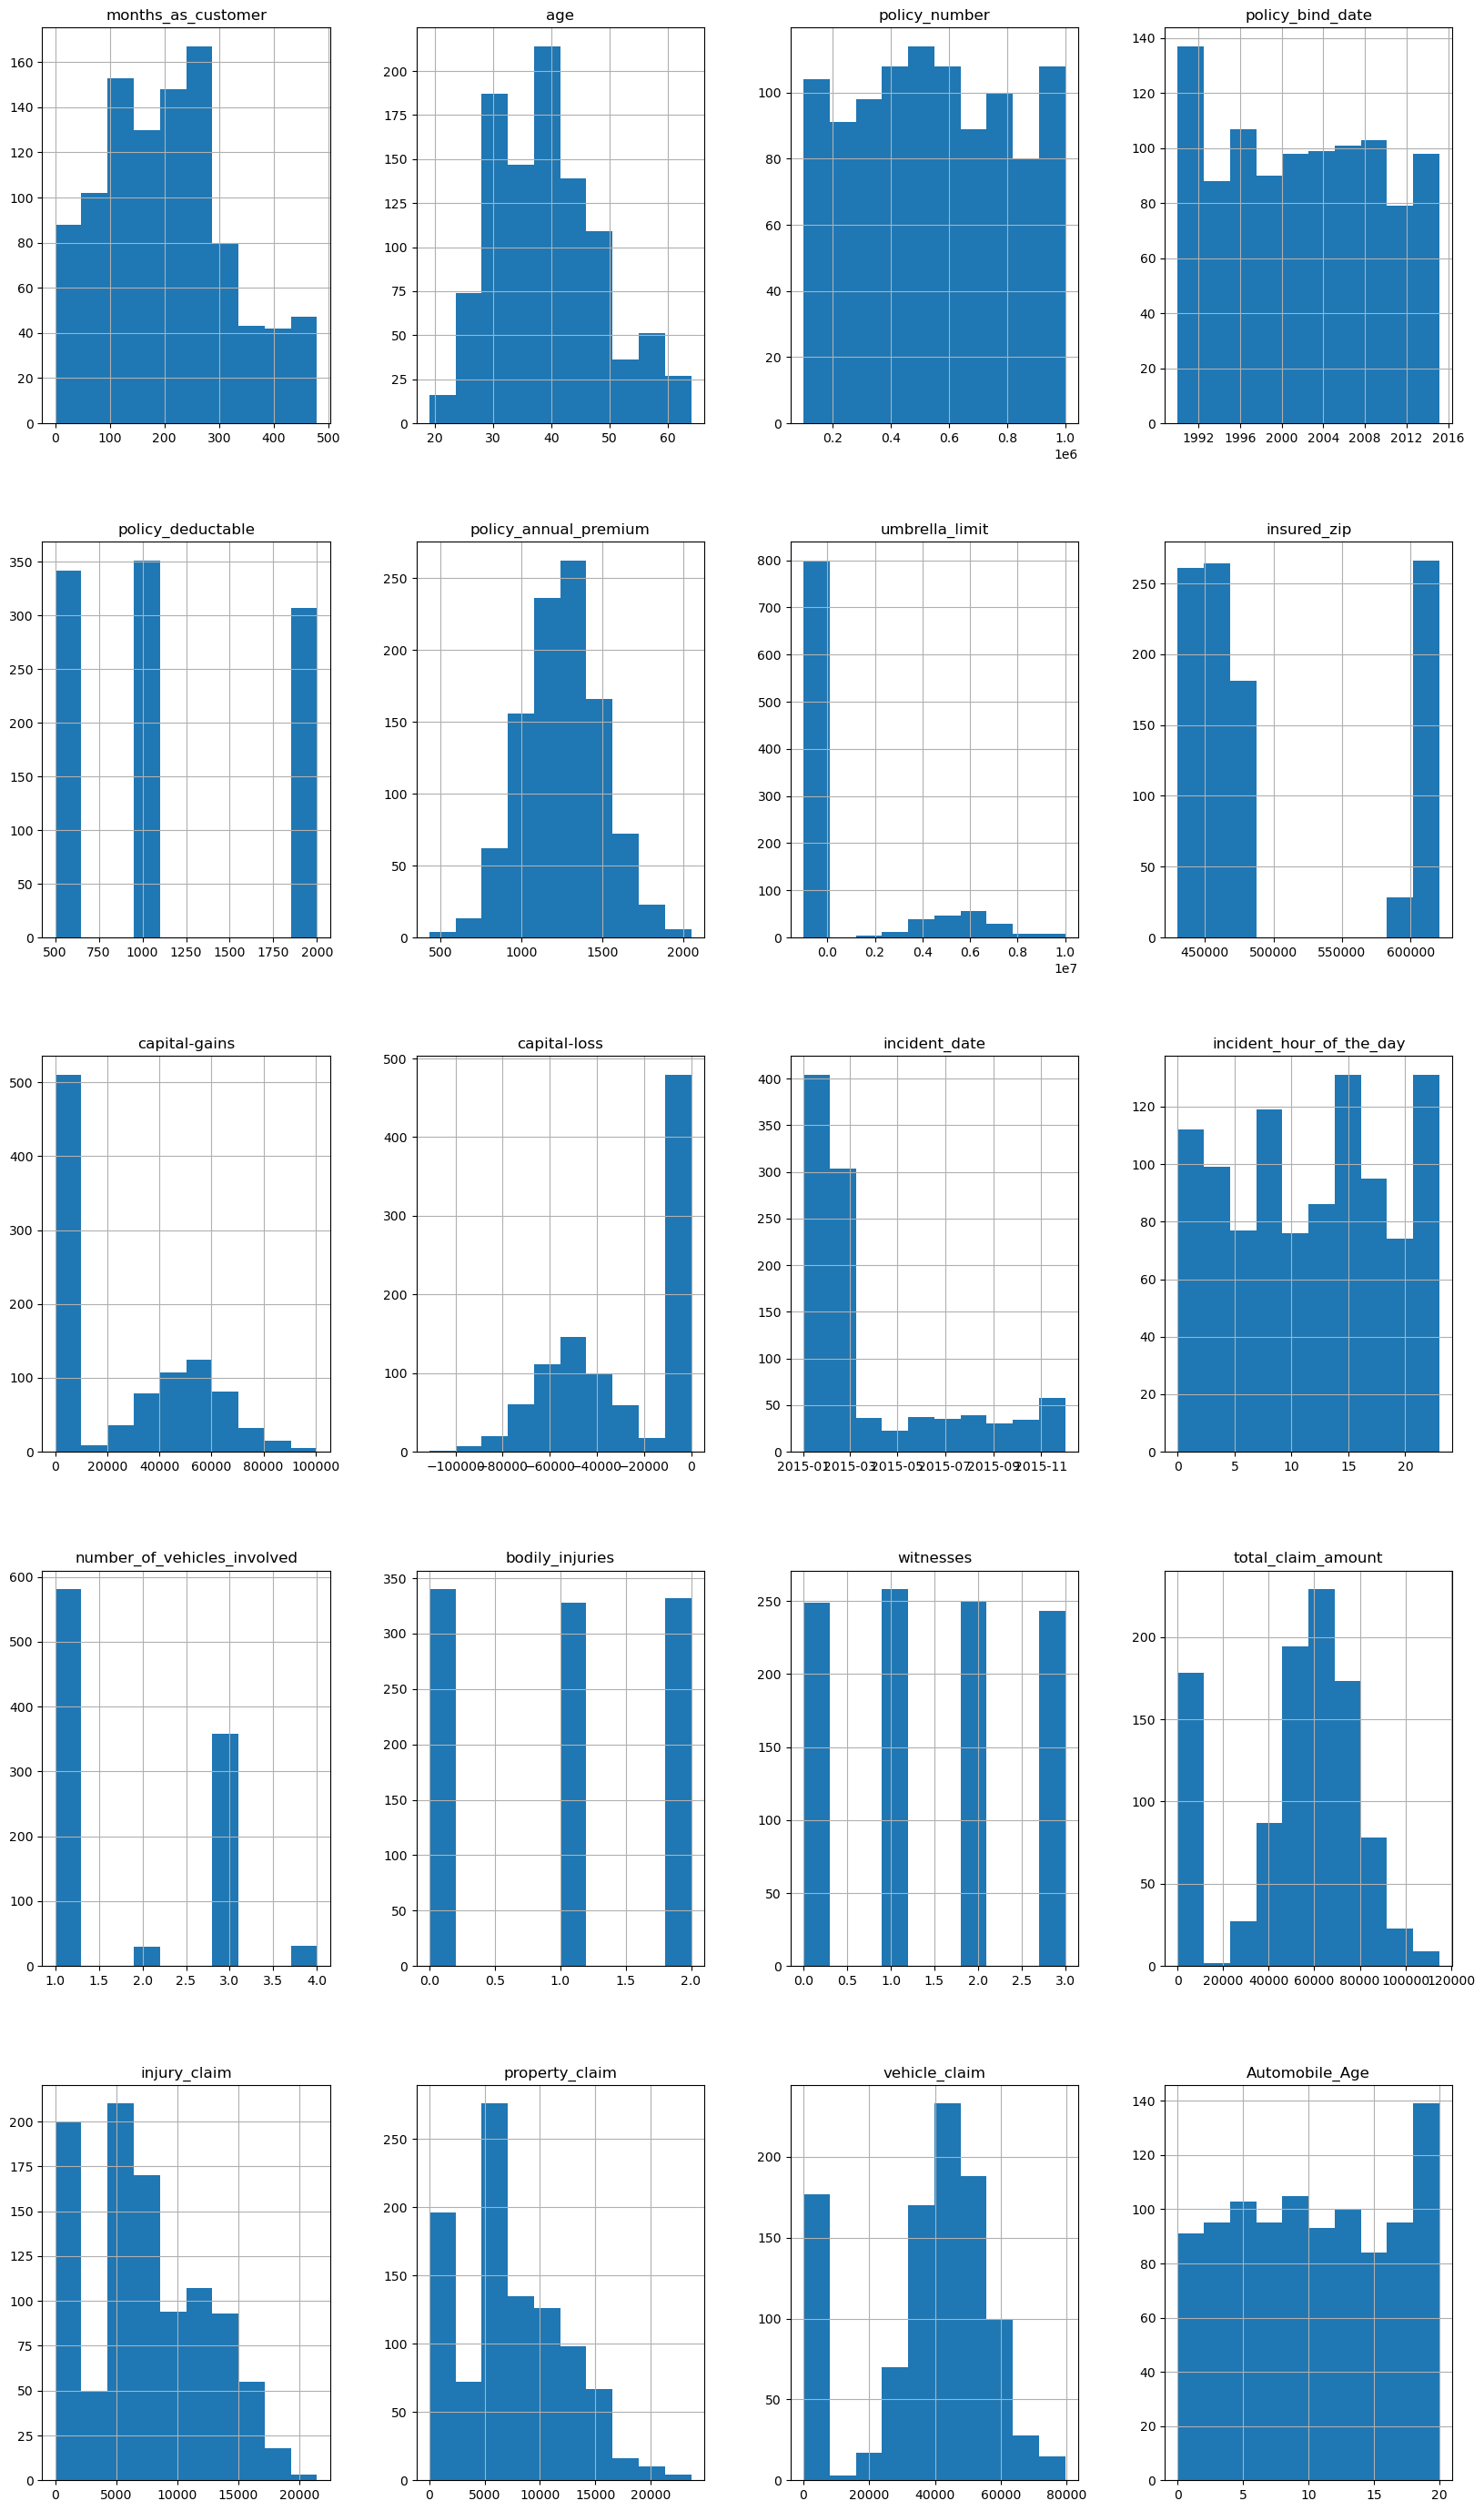

In [28]:
df.hist(figsize = (20,35))
#capital_win is right skewed and loss is left skewed
#annual claim is close to normal distribution
#we check continous feature's outlier and correct them

In [29]:
# we can do different different analysis on feature 

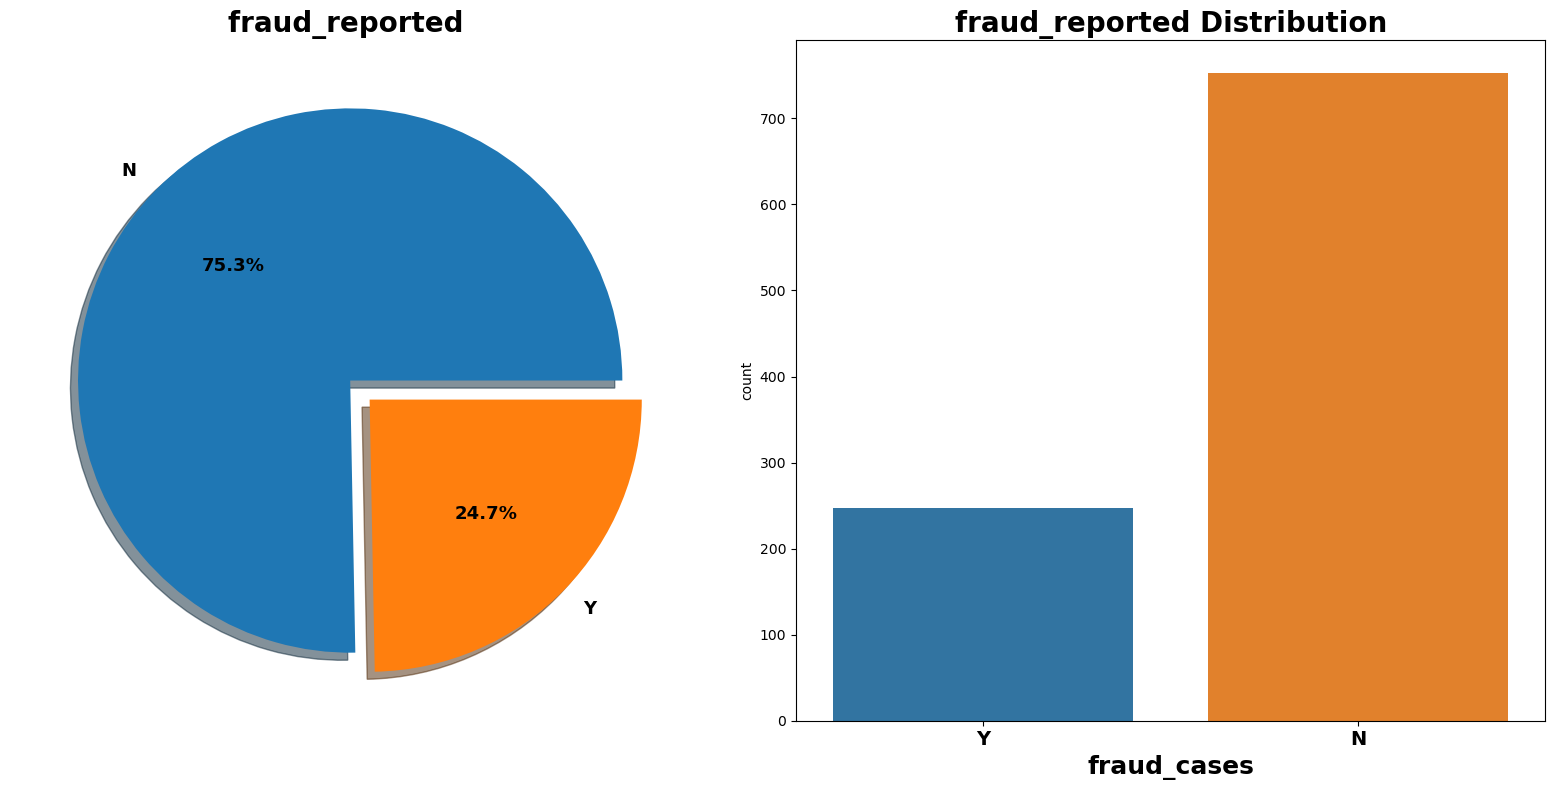

In [30]:

f,ax=plt.subplots(1,2,figsize=(16,8))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('fraud_reported ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('fraud_reported Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("fraud_cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [31]:
#Out of all cases around more than 200 cases are Fraud.
#'fraud_reported' is our target variable to be predicted.
#data set is inbalanced in nature

In [32]:
#will do Analysing  for different different features

print(df.age.min(),'Years')
print(df.age.max(),'Years')
print(df.age.mean(),'Years')


19 Years
64 Years
38.948 Years


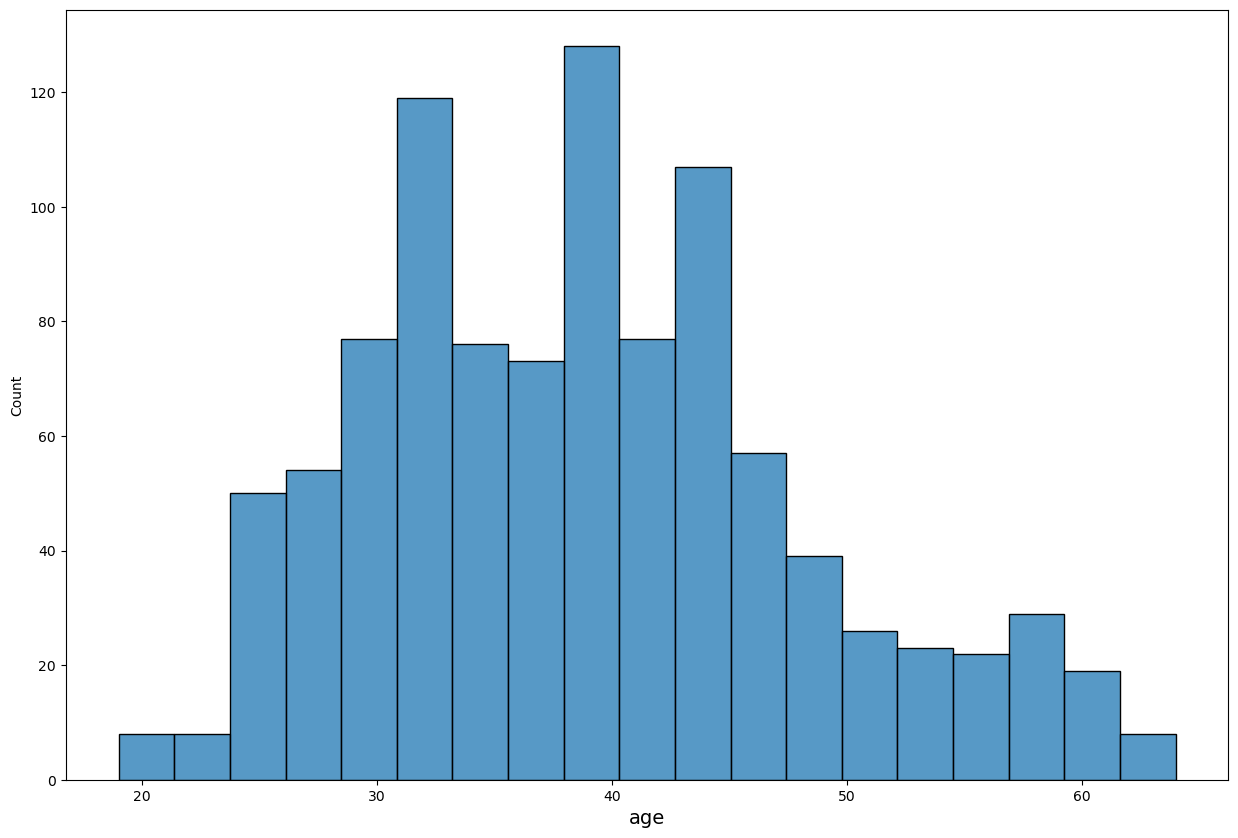

In [33]:
plt.figure(figsize=(15,10))
sns.histplot(df.age)
plt.xlabel('age',fontsize=14)
plt.show()

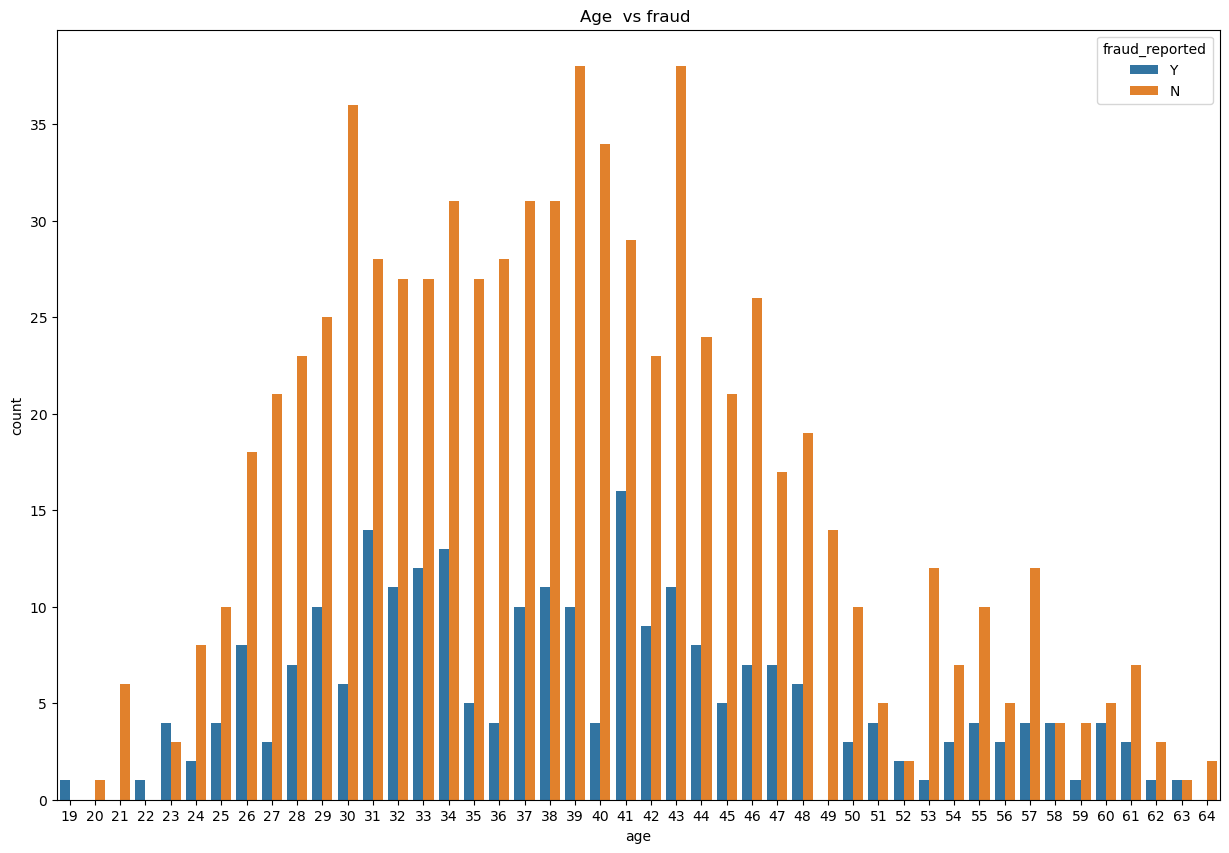

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(x=df.age,hue=df.fraud_reported)
plt.xlabel('age')
plt.title('Age  vs fraud ')
plt.show()

#Maximum fraud cases comes from people with age group of 30-50 year.
#Very few cases in 60+ year old peoples.

In [35]:
#policy_state vs  Fraud cases

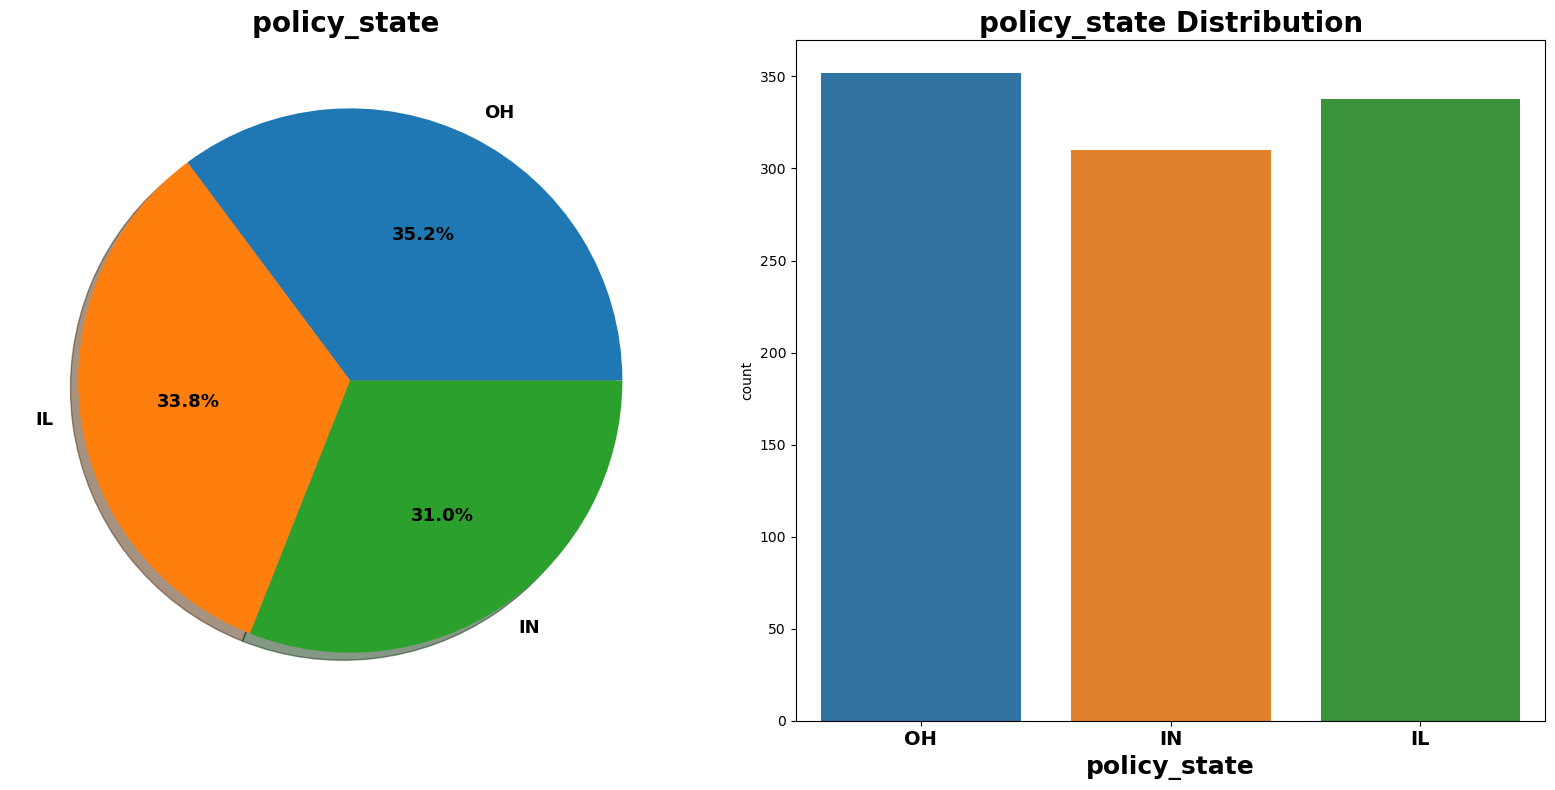

In [36]:
    
f,ax=plt.subplots(1,2,figsize=(16,8))
df['policy_state'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('policy_state ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('policy_state',data=df,ax=ax[1])
ax[1].set_title('policy_state Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("policy_state",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='policy_state'>

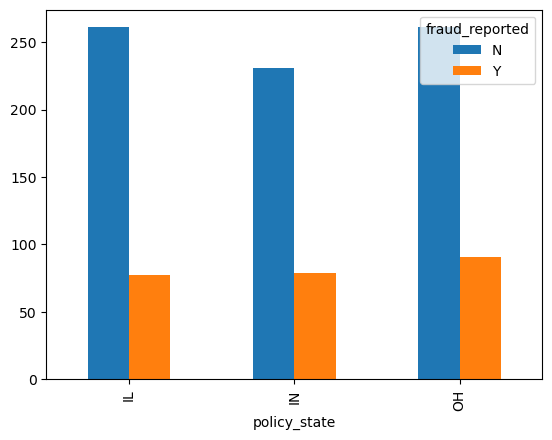

In [37]:
table = pd.crosstab(df['policy_state'],df['fraud_reported'])
table.plot(kind = 'bar')
#Almost same amout of cases come from each state.
#max cases cam from OH

In [38]:
#Insured Gender VS Fraud cases

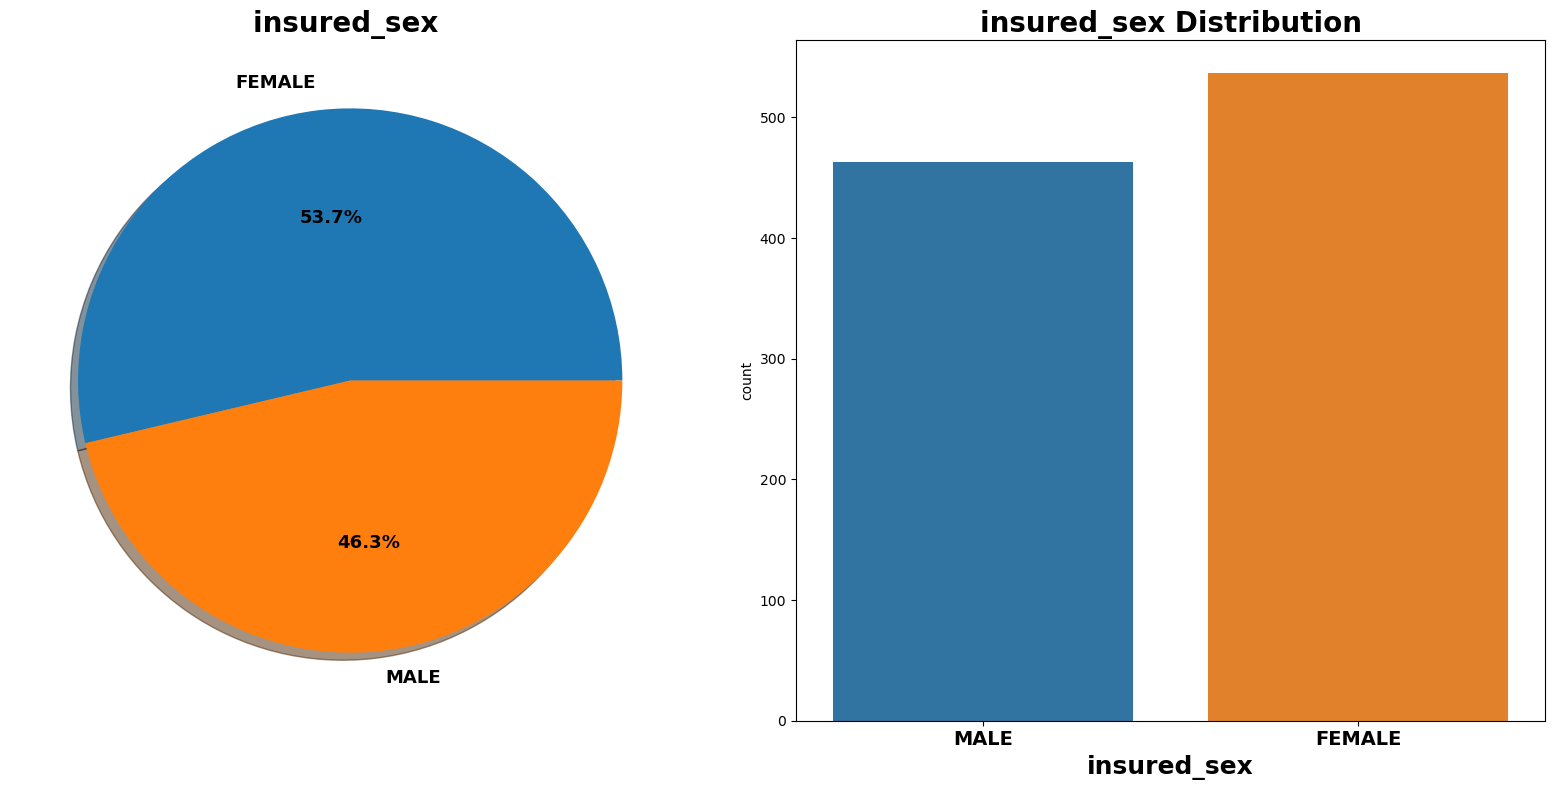

In [39]:
    
f,ax=plt.subplots(1,2,figsize=(16,8))
df['insured_sex'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('insured_sex ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('insured_sex',data=df,ax=ax[1])
ax[1].set_title('insured_sex Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("insured_sex",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='insured_sex'>

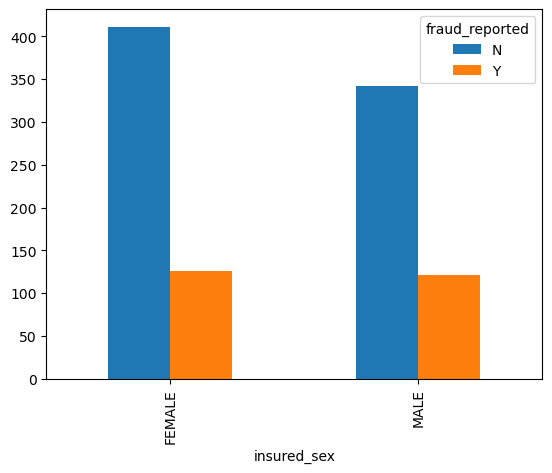

In [40]:
table = pd.crosstab(df['insured_sex'],df['fraud_reported'])
table.plot(kind = 'bar')

In [41]:
#Number of claims come from female is higher than which reported by male insured.
#Almost same amount of fraud cases comes from same gender.

In [42]:
#Education_level vs Fraud cases

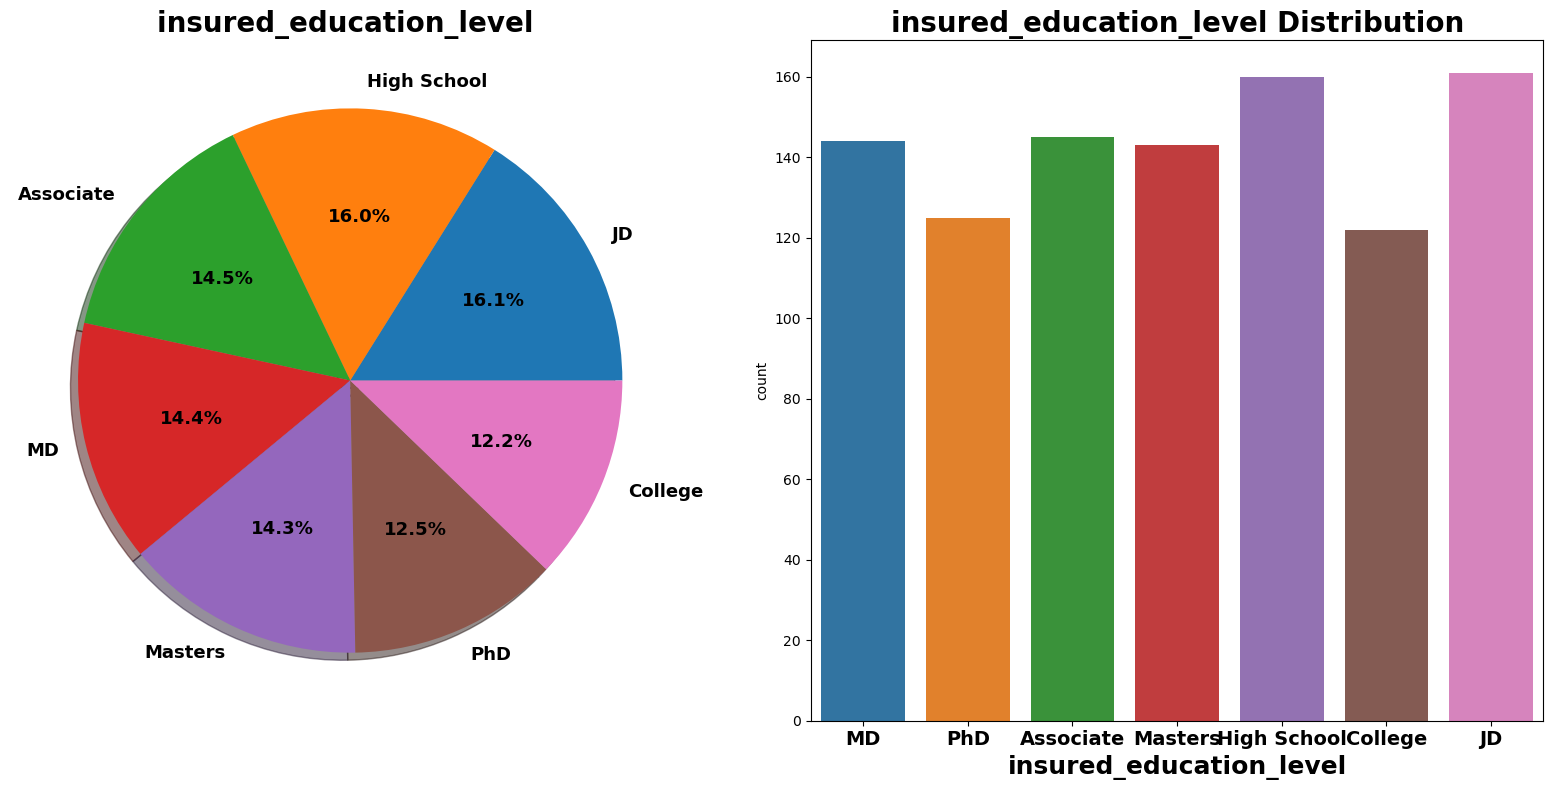

In [43]:
    
f,ax=plt.subplots(1,2,figsize=(16,8))
df['insured_education_level'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('insured_education_level ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('insured_education_level',data=df,ax=ax[1])
ax[1].set_title('insured_education_level Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("insured_education_level",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='insured_education_level'>

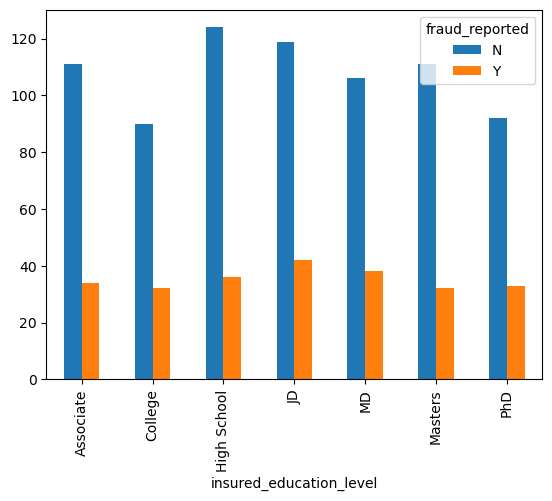

In [44]:
table = pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table.plot(kind = 'bar')

In [45]:
# fraud claims has across every education backgroud
#Education Level is not much important variable 

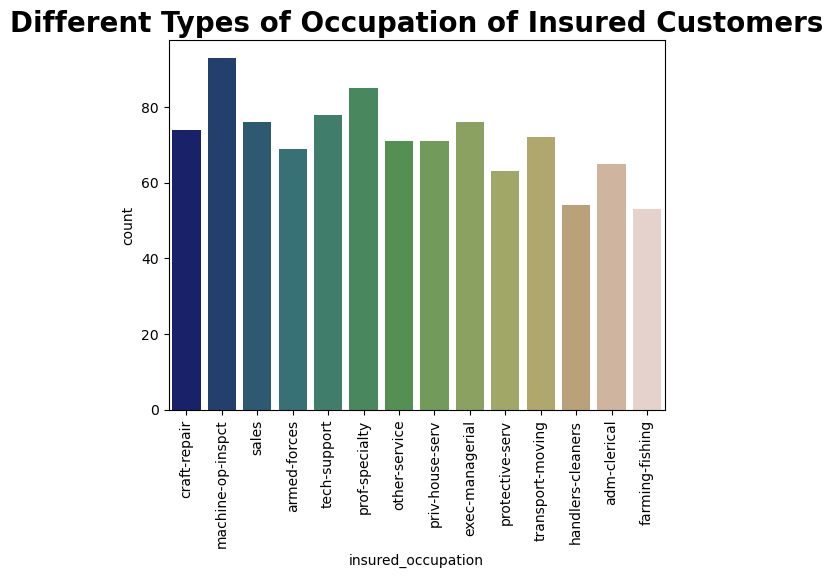

In [46]:
#insured occupation
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

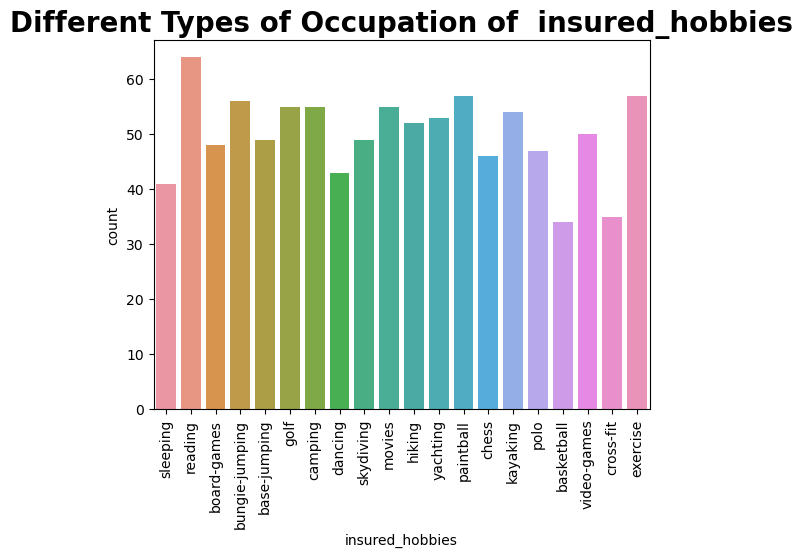

In [47]:
#insured_hobbies
sns.countplot(df['insured_hobbies'])
plt.title('Different Types of Occupation of  insured_hobbies' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

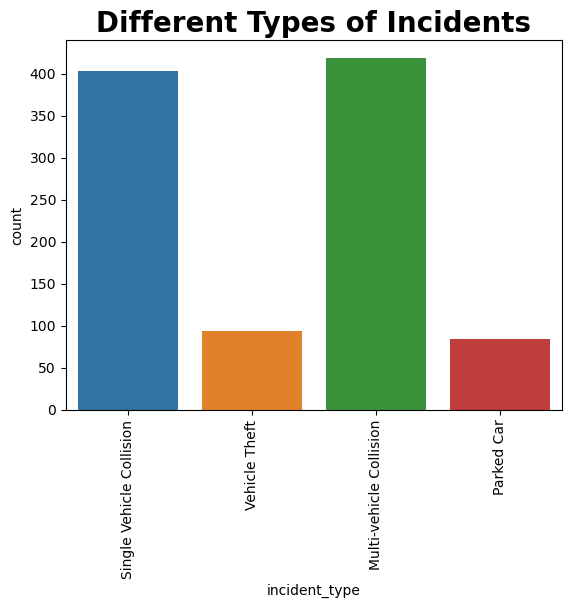

In [48]:

#Different Types of incident_type 
sns.countplot(df['incident_type'])
plt.title('Different Types of Incidents' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

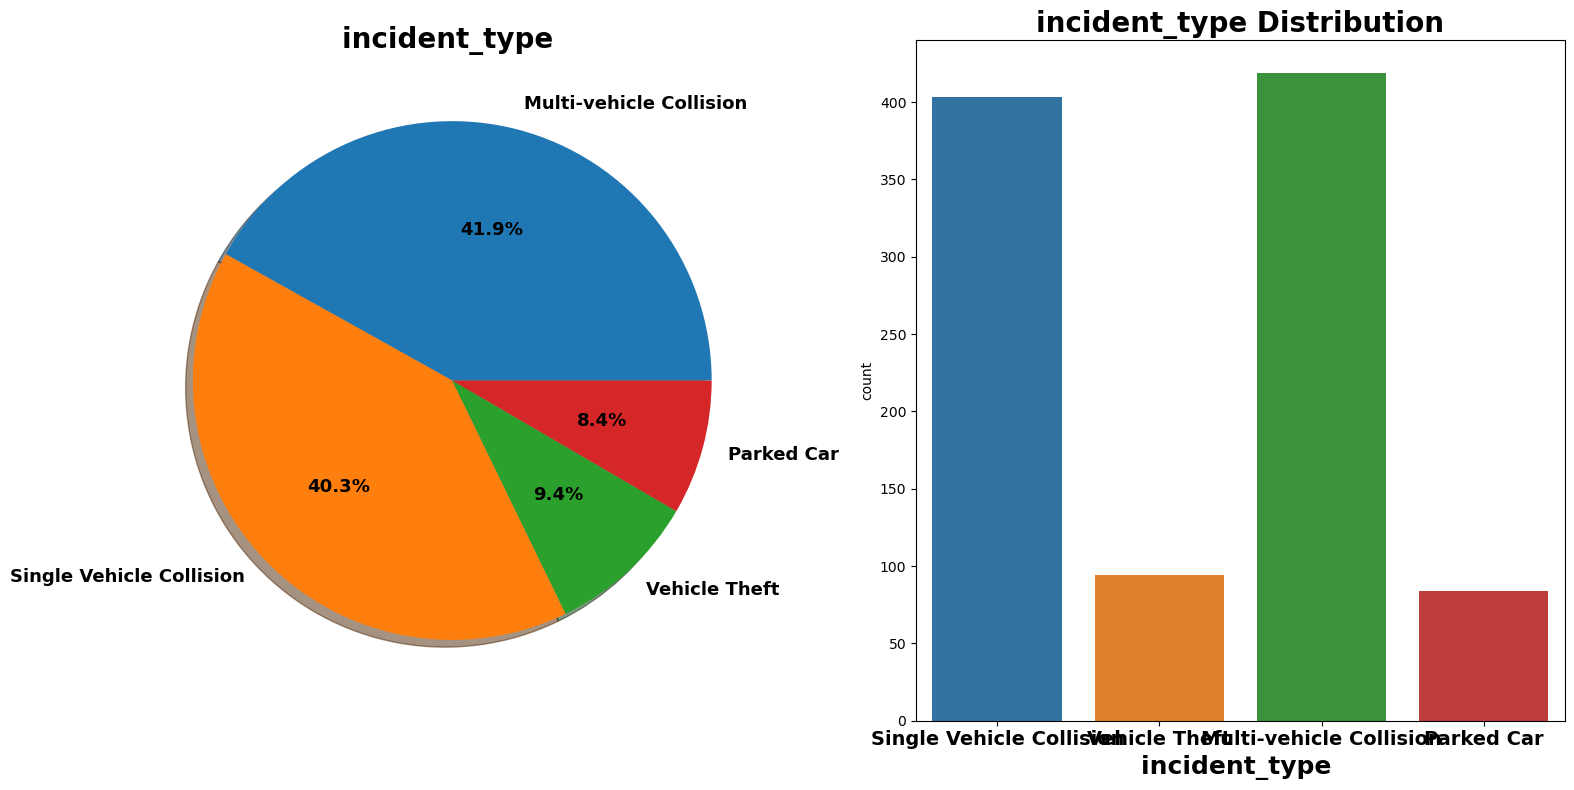

In [49]:
#incident_type vs    fraud_reported
f,ax=plt.subplots(1,2,figsize=(16,8))
df['incident_type'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('incident_type ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('incident_type Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='incident_type'>

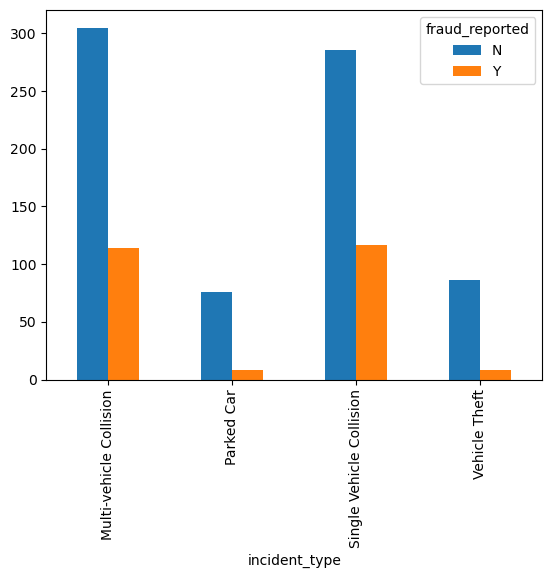

In [50]:
table = pd.crosstab(df['incident_type'],df['fraud_reported'])
table.plot(kind = 'bar')

In [51]:
#Multi-vehicle and single vehicle collision. many cases from there 
#Some claims are due to automobile robbery.

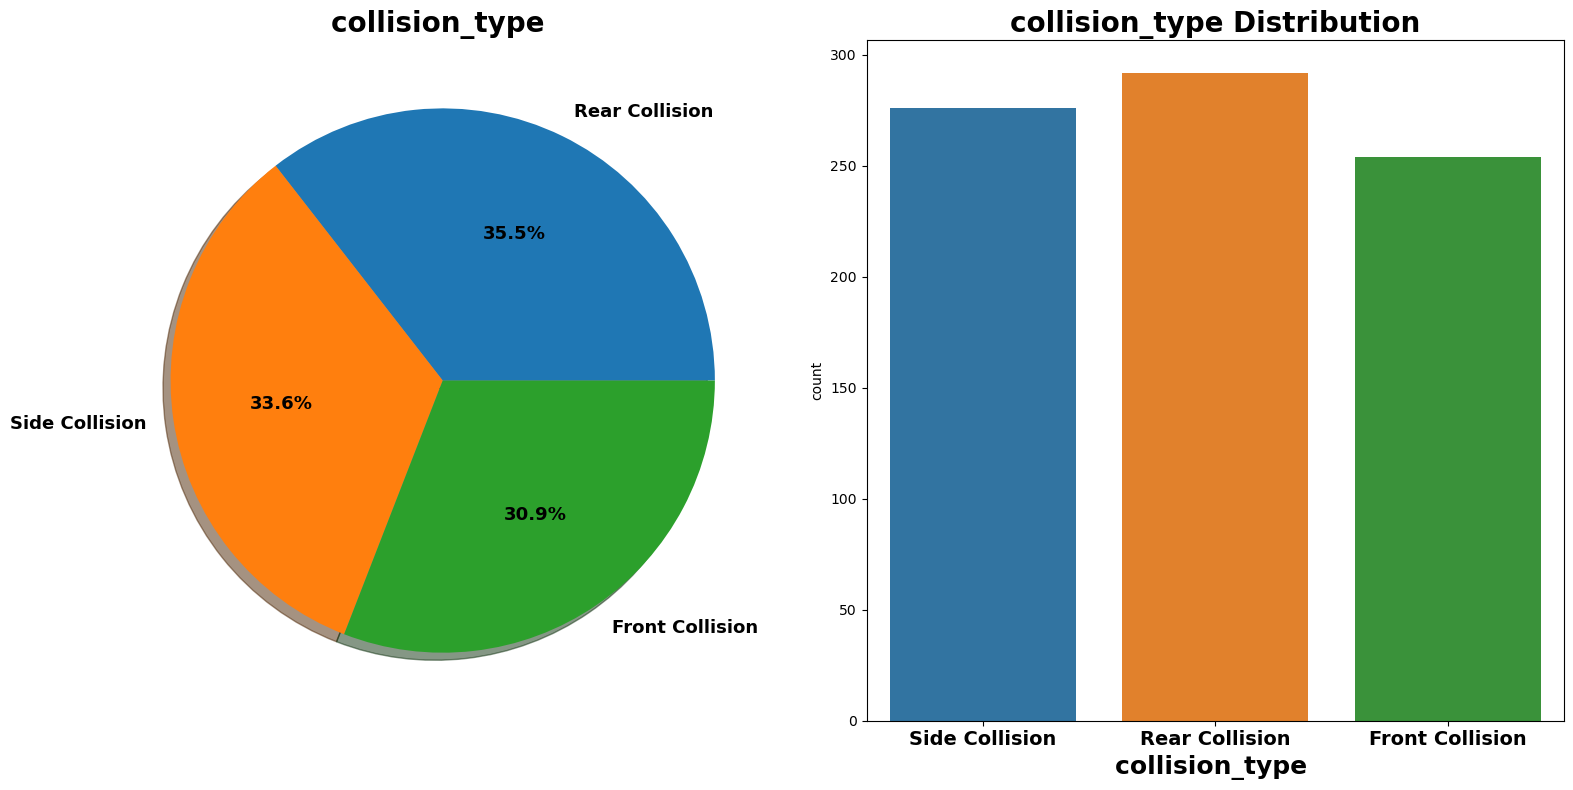

In [52]:
#incident_type vs  fraud_reported
f,ax=plt.subplots(1,2,figsize=(16,8))
df['collision_type'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('collision_type ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('collision_type',data=df,ax=ax[1])
ax[1].set_title('collision_type Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("collision_type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='collision_type'>

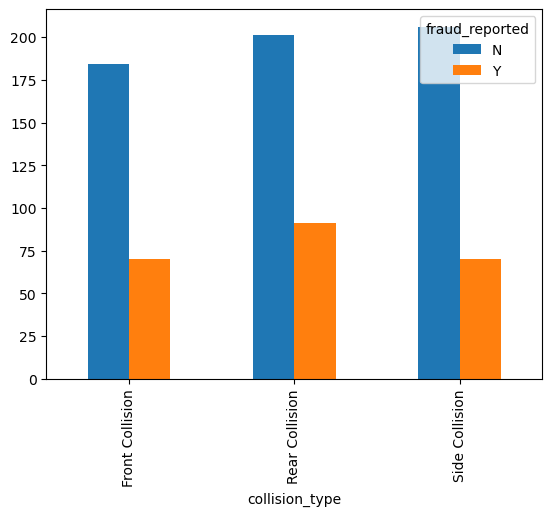

In [53]:
table = pd.crosstab(df['collision_type'],df['fraud_reported'])
table.plot(kind = 'bar')

<AxesSubplot:xlabel='collision_type'>

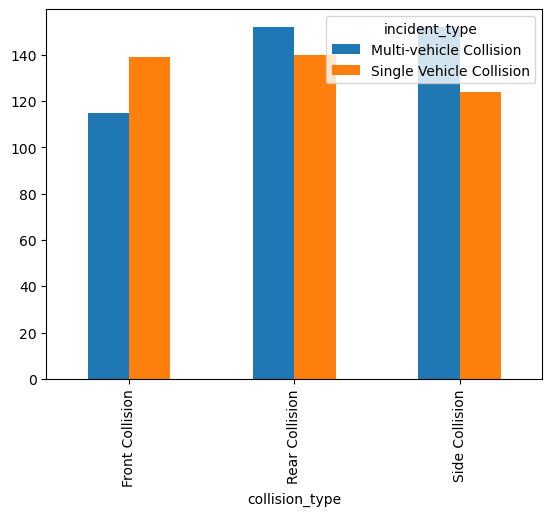

In [54]:
#incident_type and collision_type
table = pd.crosstab(df['collision_type'],df['incident_type'])
table.plot(kind = 'bar')

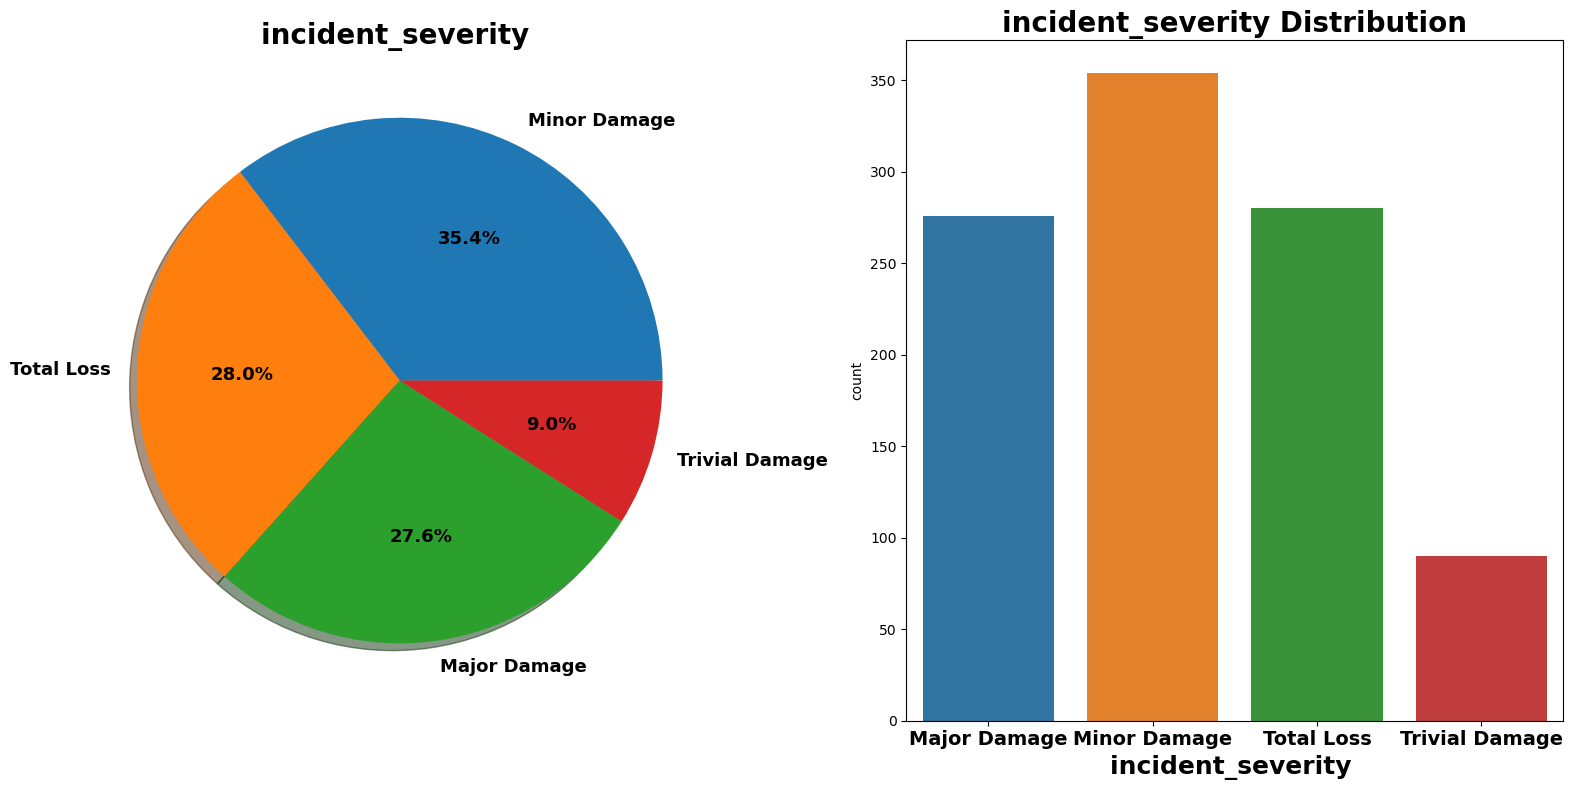

In [55]:
#Collision VS Incident Severity
f,ax=plt.subplots(1,2,figsize=(16,8))
df['incident_severity'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('incident_severity ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_severity',data=df,ax=ax[1])
ax[1].set_title('incident_severity Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_severity ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='collision_type'>

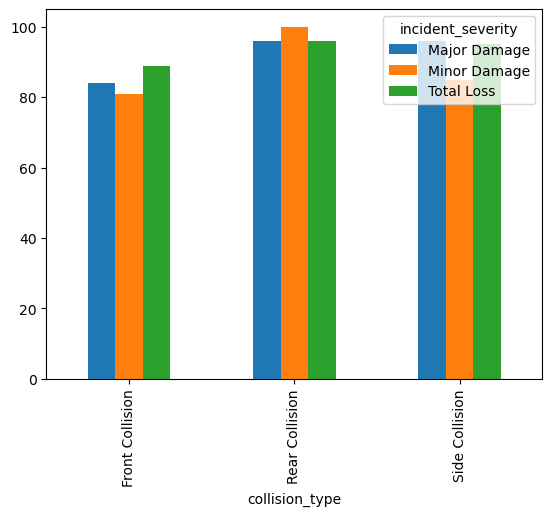

In [56]:
#incident_severity and collision_type
table = pd.crosstab(df['collision_type'],df['incident_severity'])
table.plot(kind = 'bar')

<AxesSubplot:xlabel='incident_type'>

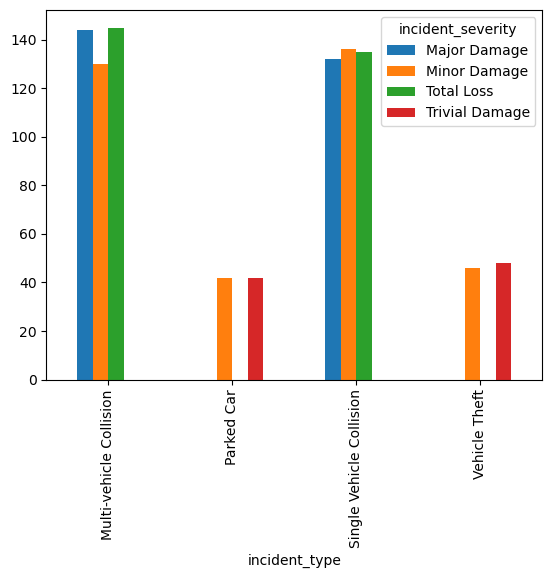

In [57]:
#incident_type and collision_type
table = pd.crosstab(df['incident_type'],df['incident_severity'])
table.plot(kind = 'bar')
#incident Type is important variable for us

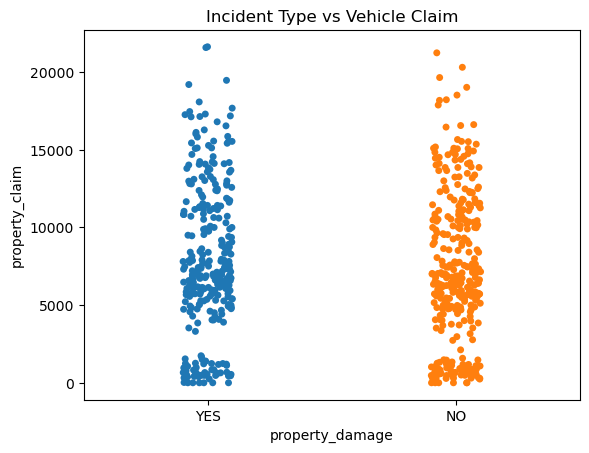

In [58]:
#stripplot for property_damage vs property_claim
sns.stripplot(df['property_damage'],df['property_claim'])
plt.title('Incident Type vs Vehicle Claim')
plt.show()

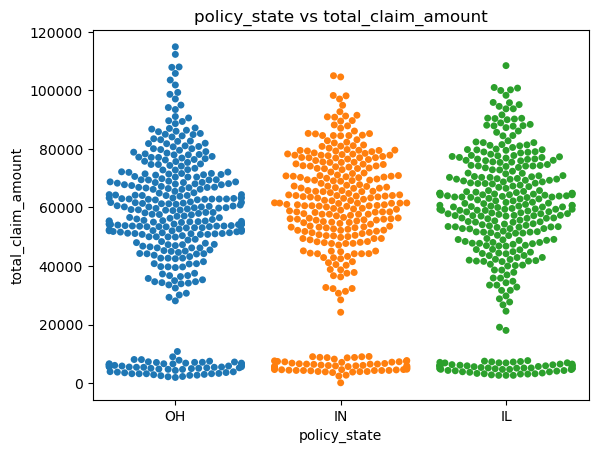

In [59]:
#swarmplot for policy_state & total_claim_amount
sns.swarmplot(df['policy_state'],df['total_claim_amount'])
plt.title('policy_state vs total_claim_amount')
plt.show()

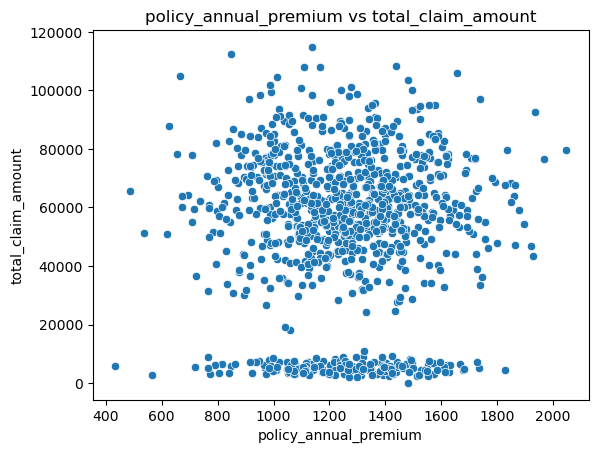

In [60]:
#scatterplot for policy_annual_premium & total_claim_amount
sns.scatterplot(df['policy_annual_premium'],df['total_claim_amount'])
plt.title('policy_annual_premium vs total_claim_amount')
plt.show()

In [61]:

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df:
    df[i] = le.fit_transform(df[i])
df.head()  

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,personal,Accedental,Automobile_Age
0,299,29,480,941,2,1,732,1,486,1,...,563,258,512,545,10,1,1,1,2,11
1,212,23,257,639,1,2,396,5,519,1,...,44,46,45,38,8,12,1,1,2,8
2,123,10,672,405,2,2,740,5,6,0,...,143,337,104,116,4,30,0,0,1,8
3,239,22,140,19,0,2,743,6,812,0,...,451,245,249,521,3,34,1,1,2,1
4,212,25,286,926,0,1,902,6,850,1,...,81,70,36,66,0,31,0,2,0,6


In [62]:

Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim',  'Automobile_Age','policy_annual_premium']

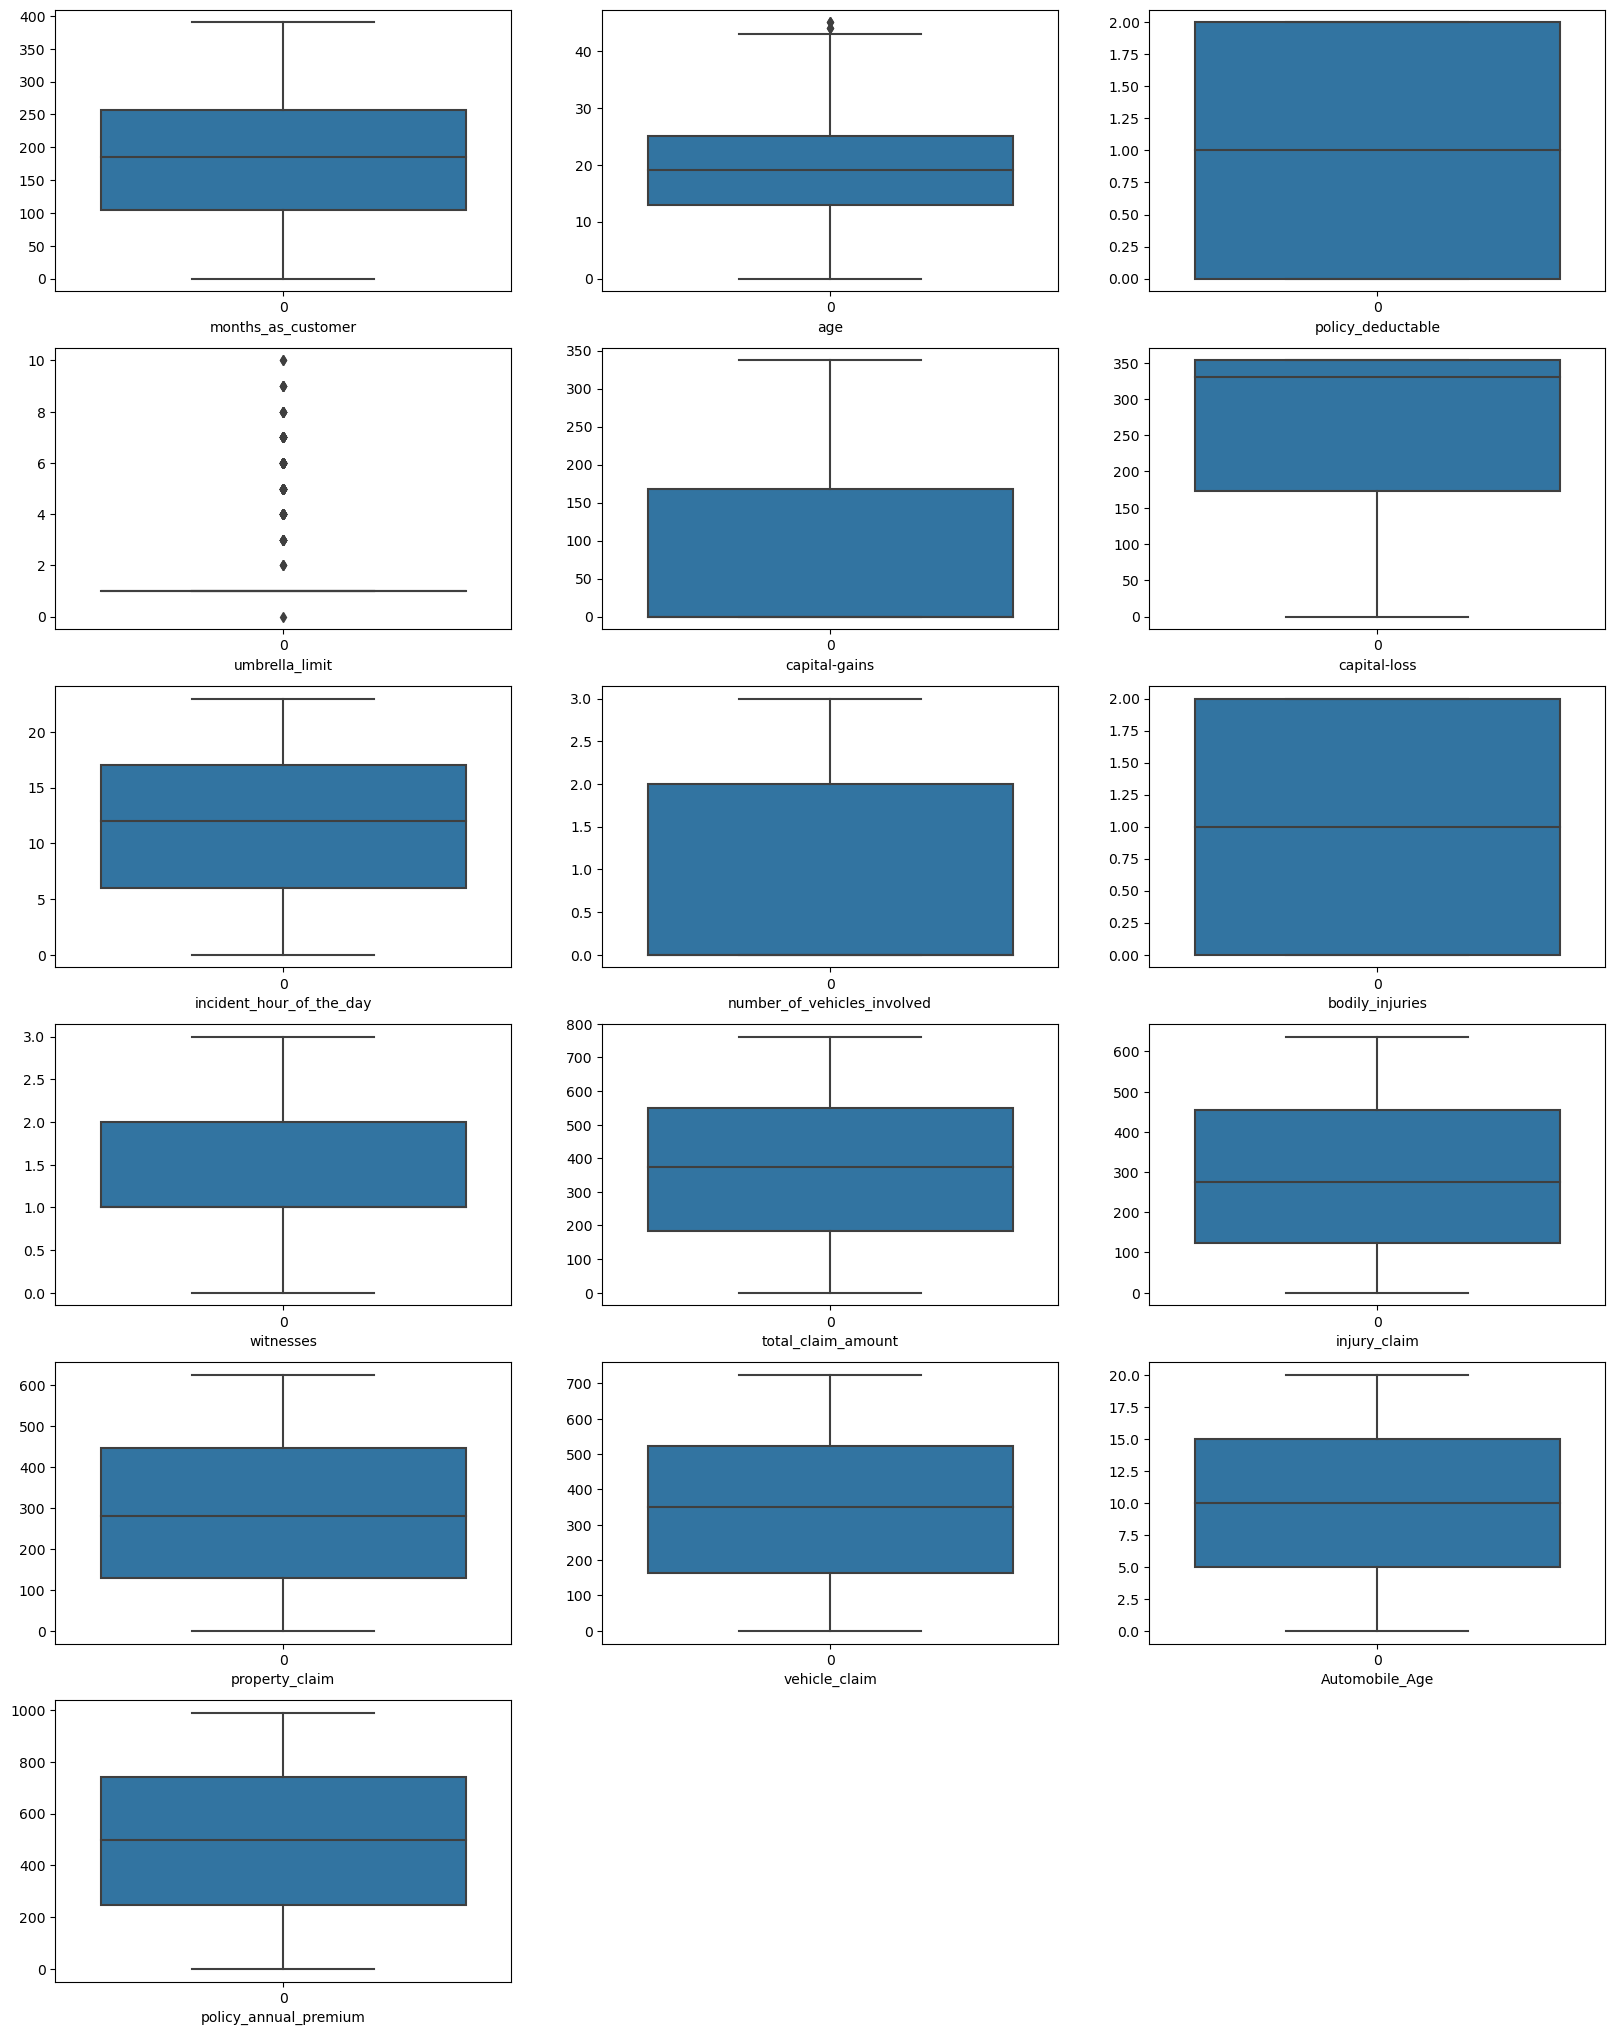

In [63]:
plt.figure(figsize=(20,30))

plotnumber = 1

for c in Numerical:
    if plotnumber <=21:
        ax = plt.subplot(7,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
#From Boxplot we can see outliers exist dataset.    

In [64]:

# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'personal', 'Accedental'], int64: ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_date', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age']}

In [65]:
df['policy_bind_date'] =pd.to_numeric(df['policy_bind_date'])
df['incident_date'] =pd.to_numeric(df['incident_date'])
# removing + sign from dependant column

In [66]:

from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
#outlier removing method 

In [67]:
df1.shape

(985, 40)

In [68]:
df.shape

(1000, 40)

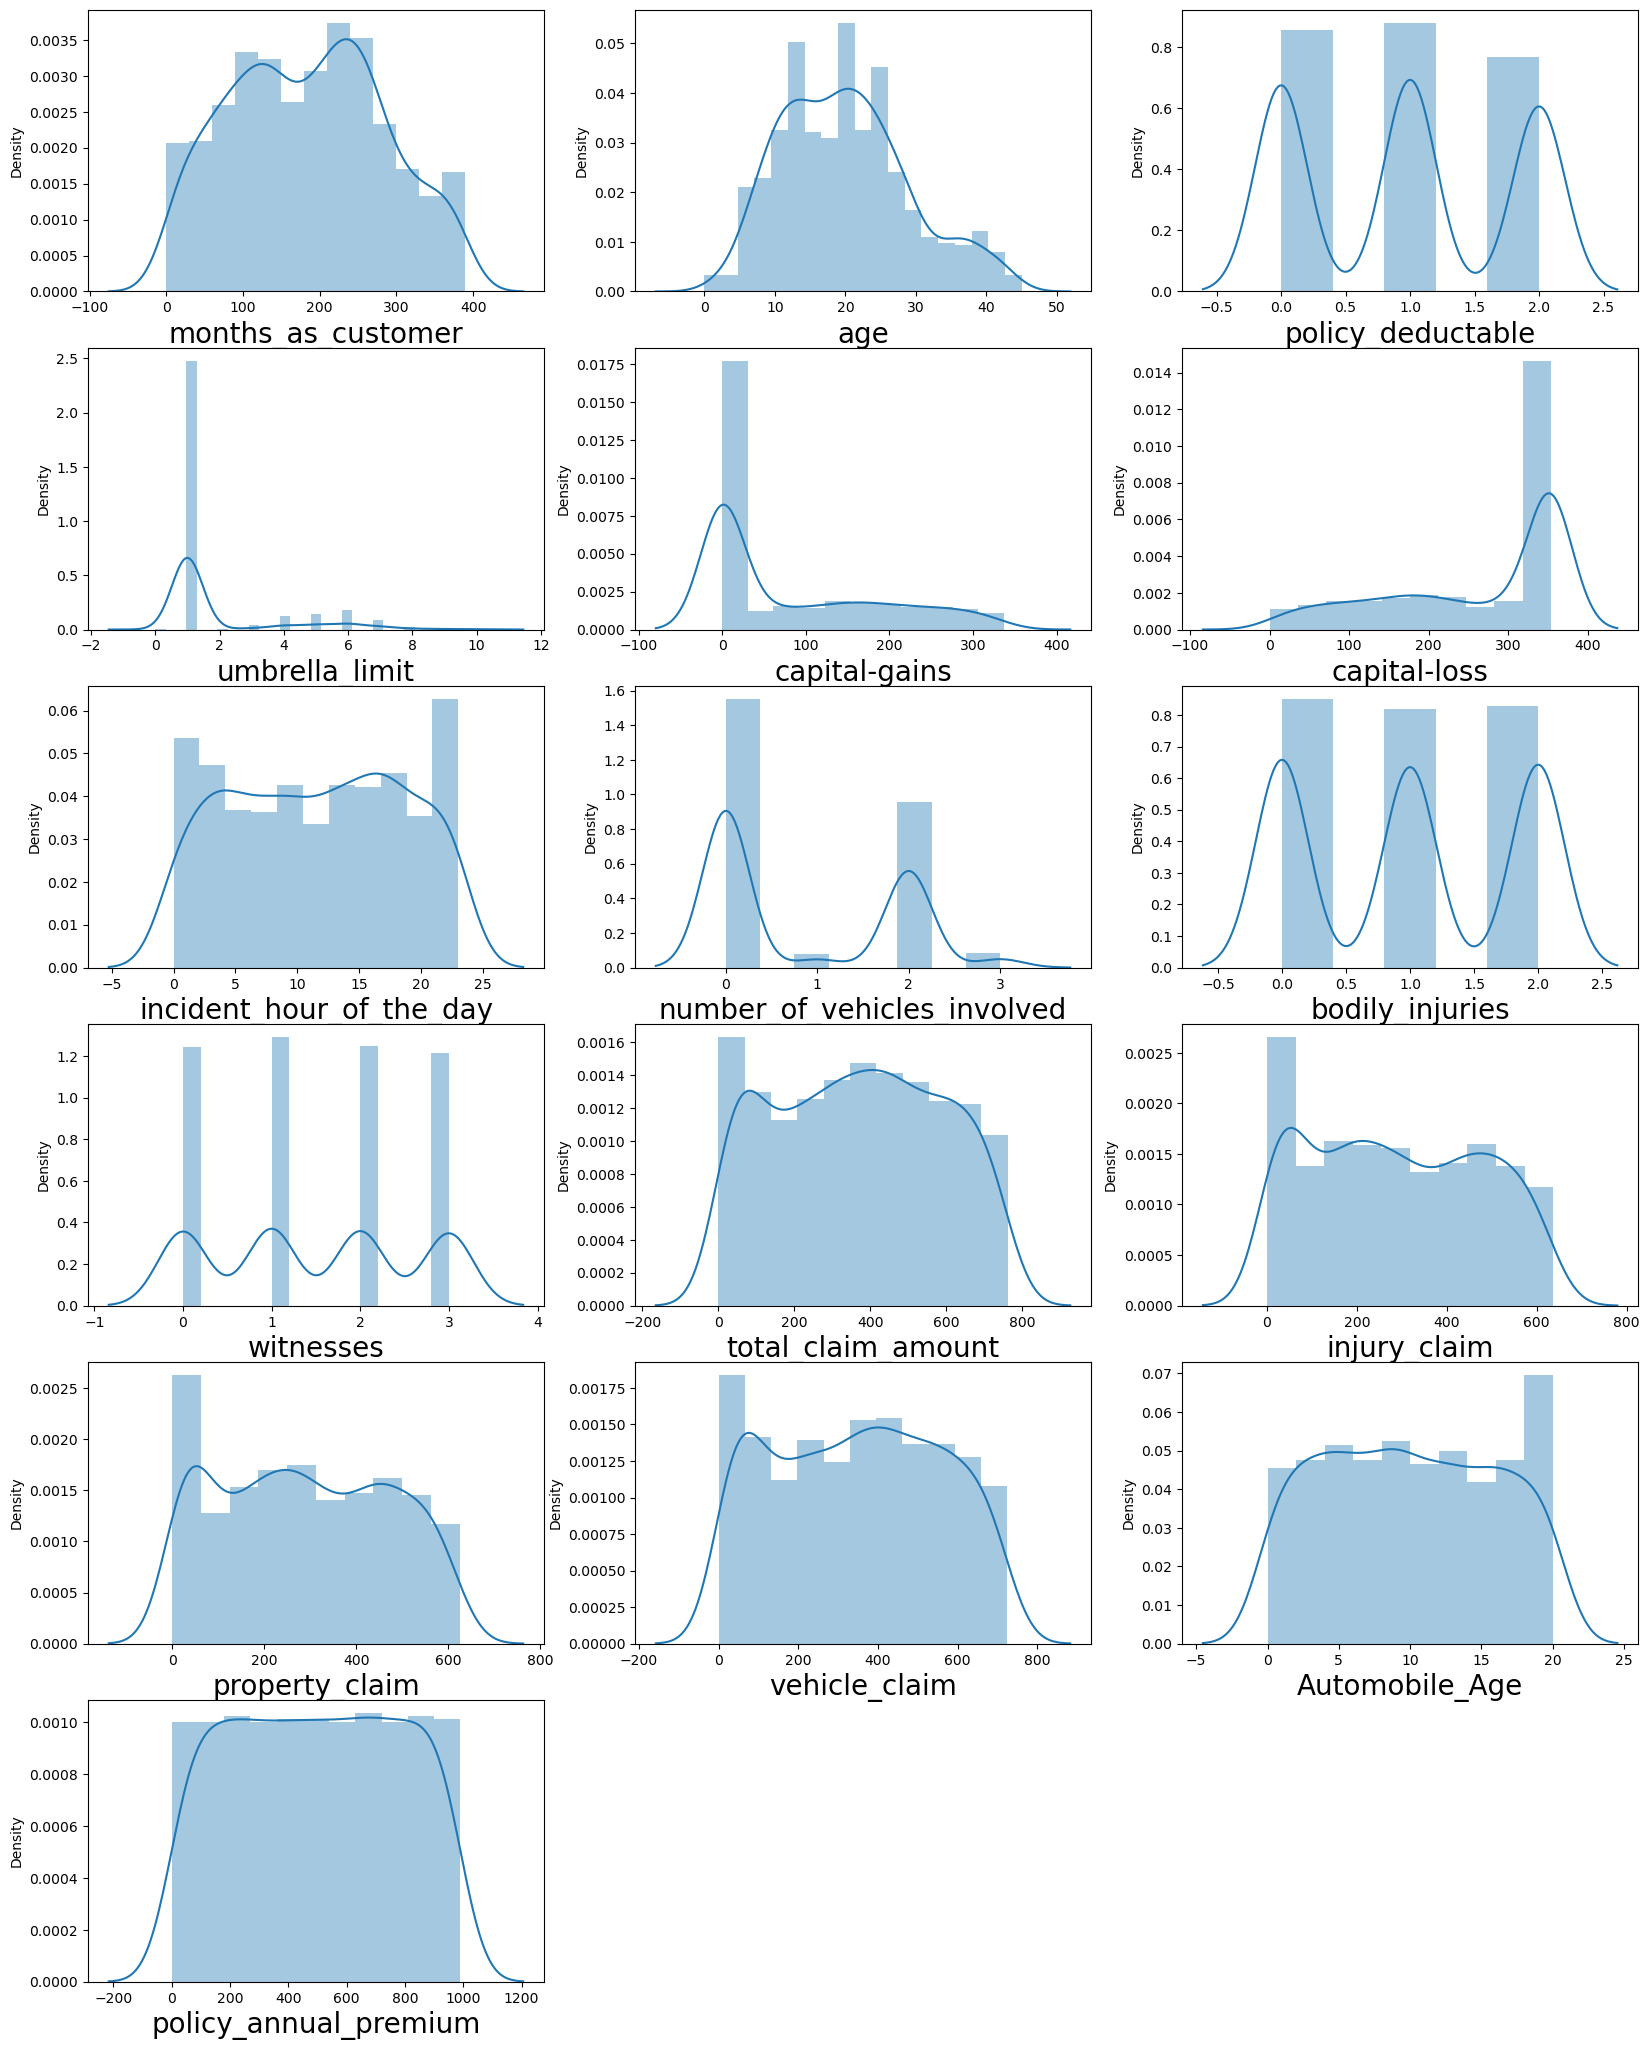

In [69]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()
#Skewness is important feature for continous data. 
#There is no relevence of skweness for discrete numerical feature like month and categorical feature.
#So we gone ignore skewness present in discrete numerical and categorical feature.

In [70]:
df1.skew()

months_as_customer             0.096656
age                            0.480506
policy_number                  0.004961
policy_bind_date               0.027511
policy_state                  -0.036054
policy_deductable              0.060667
policy_annual_premium         -0.001693
umbrella_limit                 1.902038
insured_zip                    0.005475
insured_sex                    0.144759
insured_education_level        0.004685
insured_occupation            -0.052412
insured_hobbies               -0.061536
insured_relationship           0.077333
capital-gains                  0.880109
capital-loss                  -0.807319
incident_date                  0.009576
incident_type                  0.091063
collision_type                 0.129600
incident_severity              0.281858
authorities_contacted         -0.113349
incident_state                -0.151360
incident_city                  0.045660
incident_location             -0.003796
incident_hour_of_the_day      -0.034538


In [71]:
#Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data.
#The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.
#We will use yeo-johnson method to transform negatively skewed data.

In [72]:
skew = ['total_claim_amount','vehicle_claim']
# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

#Transform skew data 
df1[skew]=scaler.fit_transform(df1[skew].values)

In [73]:
df1[skew].skew()

total_claim_amount   -0.302511
vehicle_claim        -0.302793
dtype: float64

In [74]:
df1.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,personal,Accedental,Automobile_Age
months_as_customer,1.000000,0.912209,0.063297,-0.042773,-0.008247,0.024491,0.013914,0.020517,0.020817,0.059912,...,0.052265,0.062385,0.025615,0.049891,0.045357,0.003576,0.017088,-0.025118,0.004474,-0.001915
age,0.912209,1.000000,0.064588,-0.033216,-0.019311,0.025754,0.017265,0.018886,0.018847,0.074301,...,0.070574,0.076482,0.059094,0.060581,0.032168,0.016527,0.013046,-0.016123,0.011993,-0.003840
policy_number,0.063297,0.064588,1.000000,-0.043638,0.072959,-0.020757,0.018227,0.004391,-0.000688,0.006355,...,-0.007503,-0.009964,-0.005482,-0.011047,0.023546,0.067240,-0.032235,0.043072,0.040202,-0.000556
policy_bind_date,-0.042773,-0.033216,-0.043638,1.000000,-0.002160,-0.057002,-0.001033,0.044801,0.010087,-0.033191,...,-0.006215,-0.002033,-0.000728,-0.003441,-0.008134,0.028528,0.000682,-0.018435,0.002604,-0.013629
policy_state,-0.008247,-0.019311,0.072959,-0.002160,1.000000,0.014669,0.015361,-0.011363,0.037253,-0.019168,...,-0.020418,-0.044515,0.000743,-0.011809,0.011613,-0.018738,0.035141,0.003019,0.024326,0.001315
policy_deductable,0.024491,0.025754,-0.020757,-0.057002,0.014669,1.000000,0.004706,0.016221,-0.016024,-0.009348,...,0.020980,0.029369,0.061416,0.006704,-0.027072,-0.004821,0.006096,0.006746,-0.016114,-0.026311
policy_annual_premium,0.013914,0.017265,0.018227,-0.001033,0.015361,0.004706,1.000000,-0.009966,0.042674,0.033510,...,-0.002664,-0.021955,-0.012852,0.007005,0.003753,-0.034436,-0.018768,0.019178,0.009059,0.034267
umbrella_limit,0.020517,0.018886,0.004391,0.044801,-0.011363,0.016221,-0.009966,1.000000,0.003213,0.019108,...,-0.044600,-0.051396,-0.017493,-0.043484,0.012063,0.016933,0.043020,0.012849,0.022859,-0.030638
insured_zip,0.020817,0.018847,-0.000688,0.010087,0.037253,-0.016024,0.042674,0.003213,1.000000,-0.034317,...,-0.009224,-0.009788,-0.012163,-0.019119,-0.021678,0.031105,0.056478,0.012319,-0.007389,0.032089
insured_sex,0.059912,0.074301,0.006355,-0.033191,-0.019168,-0.009348,0.033510,0.019108,-0.034317,1.000000,...,-0.014450,0.005091,-0.009367,-0.023743,0.021734,-0.018097,0.019822,-0.005922,0.073079,0.031259


<AxesSubplot:>

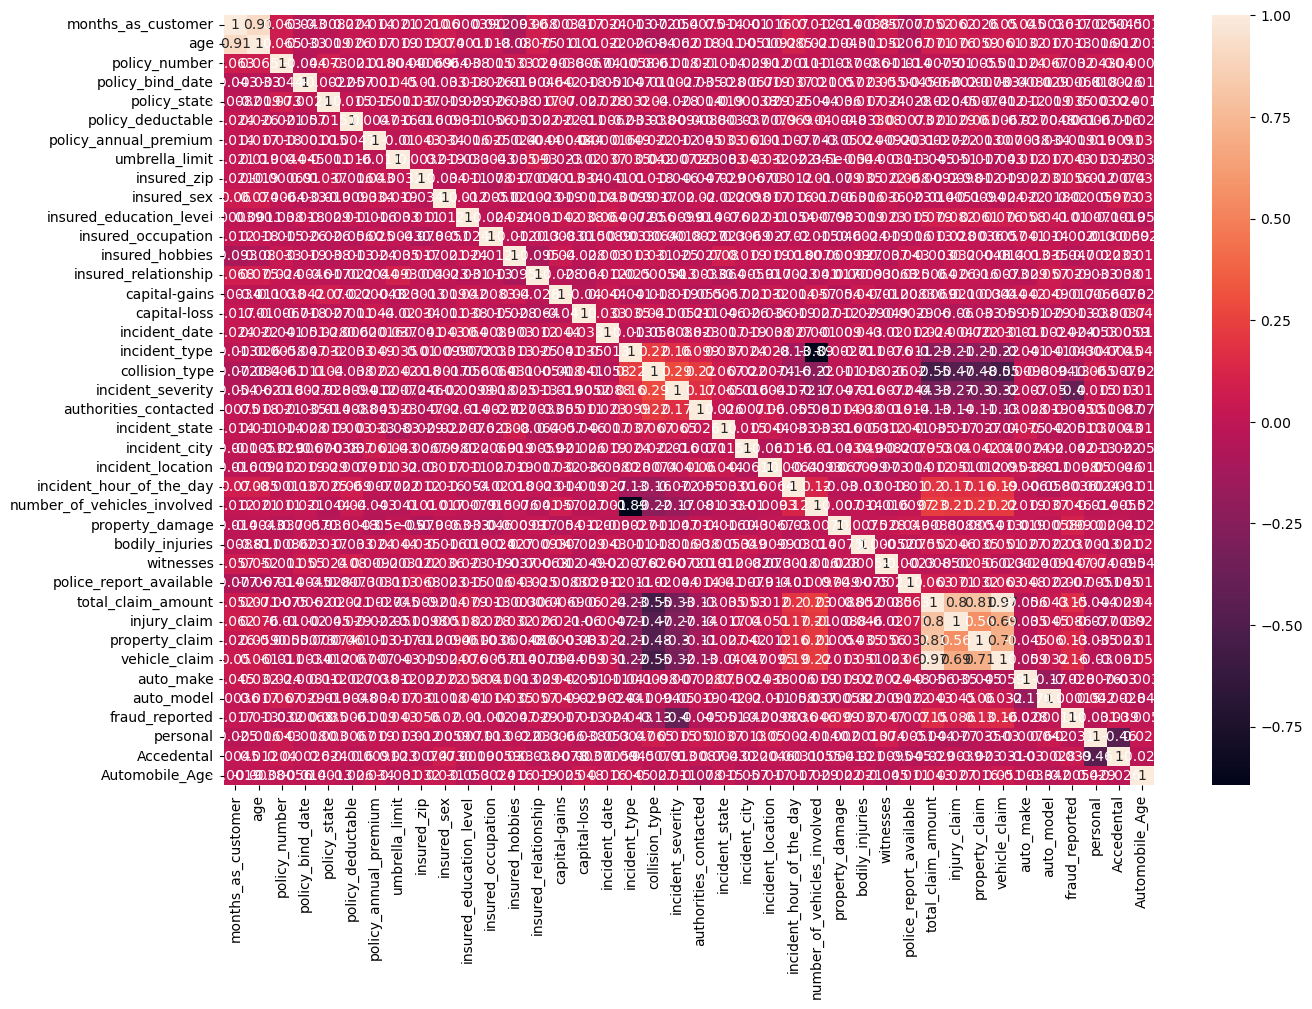

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)


In [76]:
#incident_severity is correlated with target variable with correlation of 0.4. 
#Other variable are poorly correlated with target variable.
#Other variable are poorly correlated with target variable.\
#injury_claim,property_claim,vehicle_claim are highly correlated with each other.
#incident_hour_of_the_day is highly negative correlated with incident type.

In [77]:
df1.fraud_reported.value_counts()

0    744
1    241
Name: fraud_reported, dtype: int64

In [78]:
#As Target variable data is Imbalanced in nature we will need to balance target variable.

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
x = df1.drop('fraud_reported',axis=1)
y =df1['fraud_reported']
# Splitting data in target and dependent feature

In [81]:
oversample=SMOTE()
x, y = oversample.fit_resample(x,y)

In [82]:
oversample=SMOTE()
x, y = oversample.fit_resample(x,y)

In [83]:
y.value_counts()

1    744
0    744
Name: fraud_reported, dtype: int64

In [ ]:
#We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [93]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif
#All features VIF is within permissible limit of 10.

,VIF,Features
0,26.773061,months_as_customer
1,34.682514,age
2,4.061484,policy_number
3,3.969531,policy_bind_date
4,2.598213,policy_state
5,2.515473,policy_deductable
6,4.062153,policy_annual_premium
7,2.149073,umbrella_limit
8,4.083750,insured_zip
9,1.923633,insured_sex


In [ ]:
#Removing Some of highly correlated features.
# will not work here as most of input features are correlated with each other either moderated or poorly.
#Another way to address Multicollinerity is to Scaled Data and then apply PCA.

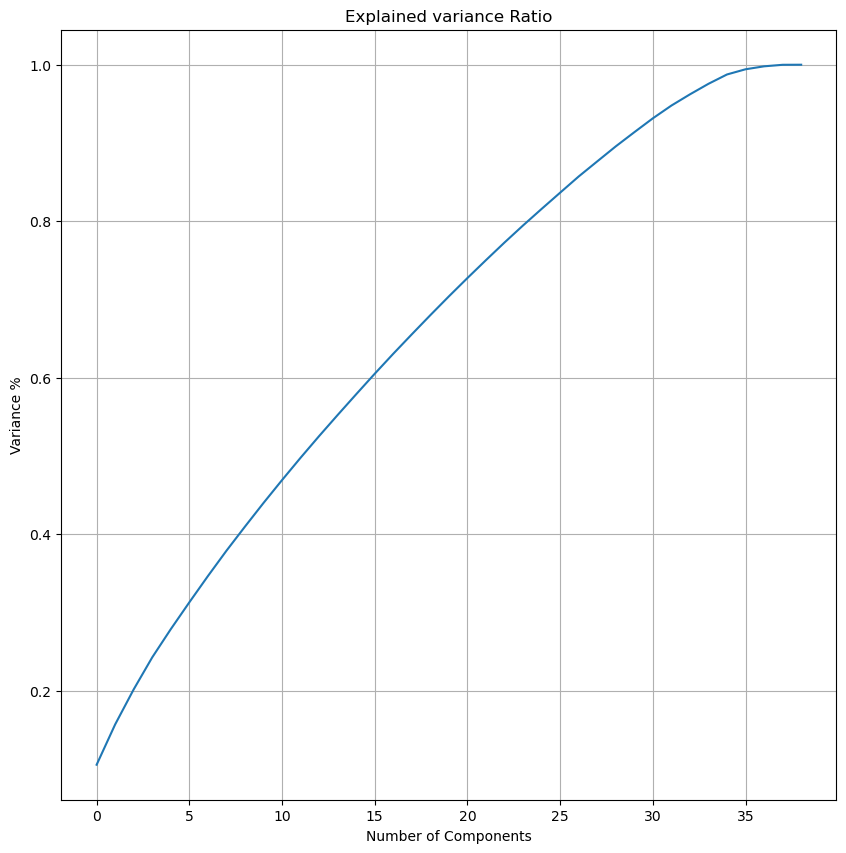

In [95]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [96]:
#AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. 
#We will  pick the first 9 components for our prediction.

pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(x_scaler)
#28 feature taken

In [98]:
x_new=pd.DataFrame(x_new,columns=np.arange(28))

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [101]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=12)

In [108]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [109]:
#creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[0.92079036, 0.07920964],
       [0.75348845, 0.24651155],
       [0.51697486, 0.48302514],
       [0.22157376, 0.77842624],
       [0.27030738, 0.72969262],
       [0.92009061, 0.07990939],
       [0.26016353, 0.73983647],
       [0.25675091, 0.74324909],
       [0.24124455, 0.75875545],
       [0.46517862, 0.53482138],
       [0.33395964, 0.66604036],
       [0.74209302, 0.25790698],
       [0.31647716, 0.68352284],
       [0.52328449, 0.47671551],
       [0.69186956, 0.30813044],
       [0.06174136, 0.93825864],
       [0.71238133, 0.28761867],
       [0.84814187, 0.15185813],
       [0.29083125, 0.70916875],
       [0.82033928, 0.17966072],
       [0.14557685, 0.85442315],
       [0.60172273, 0.39827727],
       [0.78992015, 0.21007985],
       [0.92938151, 0.07061849],
       [0.48995977, 0.51004023],
       [0.08303372, 0.91696628],
       [0.79123216, 0.20876784],
       [0.71278908, 0.28721092],
       [0.70444612, 0.29555388],
       [0.45895786, 0.54104214],
       [0.

In [110]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score77.39%
============testresult===============
accuracy_score 80.54%
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       153
           1       0.79      0.81      0.80       145

    accuracy                           0.81       298
   macro avg       0.81      0.81      0.81       298
weighted avg       0.81      0.81      0.81       298



In [111]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 64.65821526224211


In [112]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)
y_pred

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [113]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 73.83%
              precision    recall  f1-score   support

           0       0.77      0.71      0.73       153
           1       0.71      0.77      0.74       145

    accuracy                           0.74       298
   macro avg       0.74      0.74      0.74       298
weighted avg       0.74      0.74      0.74       298



In [114]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 82.53180575328226


In [115]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [116]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [117]:
d_t = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [118]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score75.71%
============testresult===============
accuracy_score 77.52%
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       153
           1       0.76      0.79      0.77       145

    accuracy                           0.78       298
   macro avg       0.78      0.78      0.78       298
weighted avg       0.78      0.78      0.78       298



In [119]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [120]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 84.23%
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       153
           1       0.87      0.80      0.83       145

    accuracy                           0.84       298
   macro avg       0.84      0.84      0.84       298
weighted avg       0.84      0.84      0.84       298



In [121]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 85.82807945224053


In [122]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [123]:
 #time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [124]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [125]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score80.42%
============testresult===============
accuracy_score 80.20%
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.85      0.72      0.78       145

    accuracy                           0.80       298
   macro avg       0.81      0.80      0.80       298
weighted avg       0.81      0.80      0.80       298



In [138]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=11)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with hence done ith that

array([[0.92079036, 0.07920964],
       [0.75348845, 0.24651155],
       [0.51697486, 0.48302514],
       [0.22157376, 0.77842624],
       [0.27030738, 0.72969262],
       [0.92009061, 0.07990939],
       [0.26016353, 0.73983647],
       [0.25675091, 0.74324909],
       [0.24124455, 0.75875545],
       [0.46517862, 0.53482138],
       [0.33395964, 0.66604036],
       [0.74209302, 0.25790698],
       [0.31647716, 0.68352284],
       [0.52328449, 0.47671551],
       [0.69186956, 0.30813044],
       [0.06174136, 0.93825864],
       [0.71238133, 0.28761867],
       [0.84814187, 0.15185813],
       [0.29083125, 0.70916875],
       [0.82033928, 0.17966072],
       [0.14557685, 0.85442315],
       [0.60172273, 0.39827727],
       [0.78992015, 0.21007985],
       [0.92938151, 0.07061849],
       [0.48995977, 0.51004023],
       [0.08303372, 0.91696628],
       [0.79123216, 0.20876784],
       [0.71278908, 0.28721092],
       [0.70444612, 0.29555388],
       [0.45895786, 0.54104214],
       [0.

In [139]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score75.13%
============testresult===============
accuracy_score 70.13%
              precision    recall  f1-score   support

           0       0.92      0.46      0.61       153
           1       0.63      0.96      0.76       145

    accuracy                           0.70       298
   macro avg       0.77      0.71      0.68       298
weighted avg       0.78      0.70      0.68       298



In [140]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 68.41502271032473


In [141]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 2}

In [142]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 2)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=2)

In [143]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 83.22%
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       153
           1       0.78      0.91      0.84       145

    accuracy                           0.83       298
   macro avg       0.84      0.83      0.83       298
weighted avg       0.84      0.83      0.83       298

============trainresult===============
accuracy_score98.40%


In [144]:
# GradientBoostingClassifier model
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[0.8729163 , 0.1270837 ],
       [0.84911968, 0.15088032],
       [0.18350264, 0.81649736],
       [0.21445224, 0.78554776],
       [0.57222292, 0.42777708],
       [0.96286515, 0.03713485],
       [0.1880326 , 0.8119674 ],
       [0.19363473, 0.80636527],
       [0.23365292, 0.76634708],
       [0.66866498, 0.33133502],
       [0.43369315, 0.56630685],
       [0.83641581, 0.16358419],
       [0.31097166, 0.68902834],
       [0.91182747, 0.08817253],
       [0.73438724, 0.26561276],
       [0.11733079, 0.88266921],
       [0.70995034, 0.29004966],
       [0.80873848, 0.19126152],
       [0.15130288, 0.84869712],
       [0.63225147, 0.36774853],
       [0.3427452 , 0.6572548 ],
       [0.45979547, 0.54020453],
       [0.76758723, 0.23241277],
       [0.61059471, 0.38940529],
       [0.25296508, 0.74703492],
       [0.06438034, 0.93561966],
       [0.80739482, 0.19260518],
       [0.59108726, 0.40891274],
       [0.39722703, 0.60277297],
       [0.27975927, 0.72024073],
       [0.

In [145]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifir

============trainresult===============
accuracy_score94.45%
============testresult===============
accuracy_score 78.86%
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       153
           1       0.78      0.78      0.78       145

    accuracy                           0.79       298
   macro avg       0.79      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [147]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [148]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 


============trainresult===============
accuracy_score93.19%
============testresult===============
accuracy_score 85.23%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       153
           1       0.88      0.81      0.84       145

    accuracy                           0.85       298
   macro avg       0.86      0.85      0.85       298
weighted avg       0.85      0.85      0.85       298



In [149]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0.9, 0.1],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.3, 0.7],
       [1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.1, 0.9],
       [0. , 1. ],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.1,

In [150]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score99.24%
============testresult===============
accuracy_score 79.53%
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       153
           1       0.84      0.72      0.77       145

    accuracy                           0.80       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.80      0.80      0.79       298



In [151]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 85.08507897769644


In [ ]:
#final modeel is RandomForestClassifier as giving best result after hyperparameter tuning as we have taken that model 